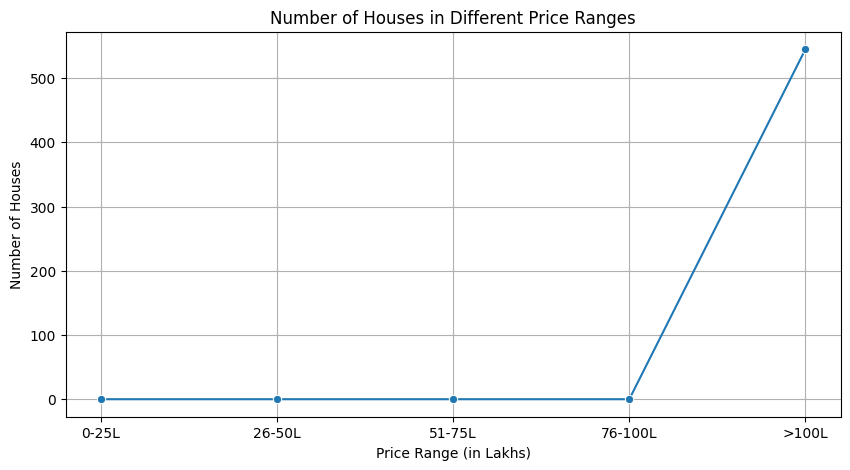

<ipython-input-2-0e87c33d8360>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices_ac.index, y=avg_prices_ac.values, palette='pastel')


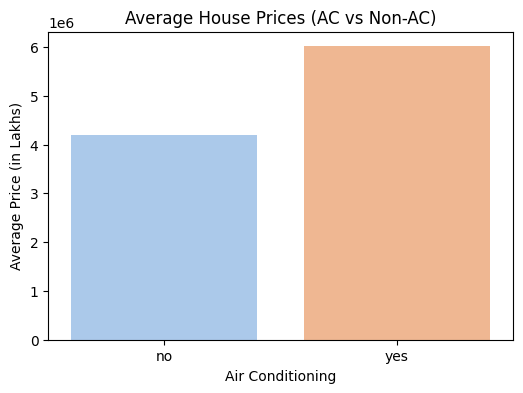

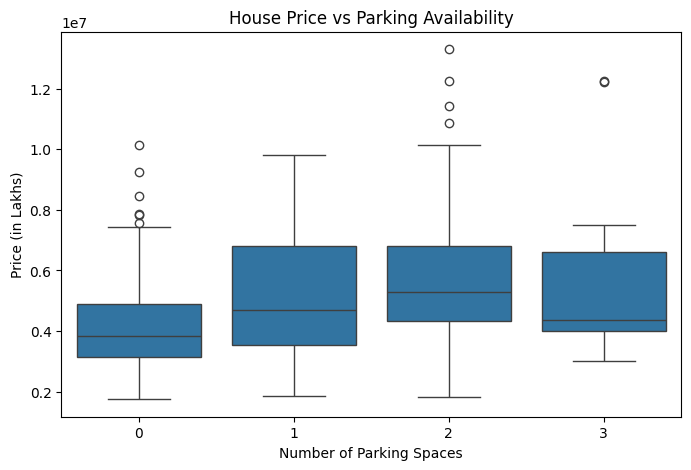

Average price for houses <5000 sqft & no prefarea: ₹ 3827671.56 lakhs
Average price for houses >5000 sqft & with prefarea: ₹ 6546807.69 lakhs
Price gap: ₹ 2719136.13 lakhs


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Housing.csv')


df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['price'], inplace=True)


bins = [0, 25, 50, 75, 100, float('inf')]
labels = ['0-25L', '26-50L', '51-75L', '76-100L', '>100L']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

price_range_counts = df['price_range'].value_counts().sort_index()


plt.figure(figsize=(10, 5))
sns.lineplot(x=price_range_counts.index, y=price_range_counts.values, marker='o')
plt.title('Number of Houses in Different Price Ranges')
plt.xlabel('Price Range (in Lakhs)')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()

avg_prices_ac = df.groupby('airconditioning')['price'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_prices_ac.index, y=avg_prices_ac.values, palette='pastel')
plt.title('Average House Prices (AC vs Non-AC)')
plt.xlabel('Air Conditioning')
plt.ylabel('Average Price (in Lakhs)')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='parking', y='price', data=df)
plt.title('House Price vs Parking Availability')
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Price (in Lakhs)')
plt.show()


cat1 = df[(df['area'] < 5000) & (df['prefarea'].str.lower() == 'no')]

cat2 = df[(df['area'] > 5000) & (df['prefarea'].str.lower() == 'yes')]

avg_cat1_price = cat1['price'].mean()
avg_cat2_price = cat2['price'].mean()
price_gap = avg_cat2_price - avg_cat1_price

print("Average price for houses <5000 sqft & no prefarea: ₹", round(avg_cat1_price, 2), "lakhs")
print("Average price for houses >5000 sqft & with prefarea: ₹", round(avg_cat2_price, 2), "lakhs")
print("Price gap: ₹", round(price_gap, 2), "lakhs")
